In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [103]:
dataset = pd.read_csv('titanic_train.csv')

In [104]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis ( EDA )

## Missing Values

In [105]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


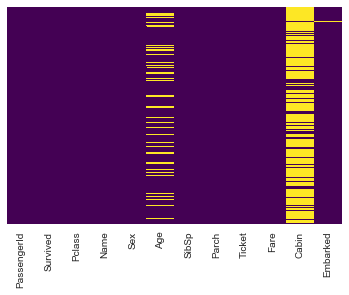

In [106]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

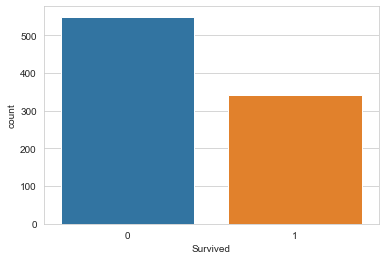

In [108]:
sns.set_style('whitegrid')
sns.countplot(data=dataset,x='Survived')

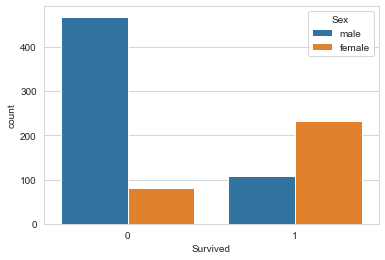

In [109]:
sns.countplot(data=dataset,x='Survived',hue='Sex')

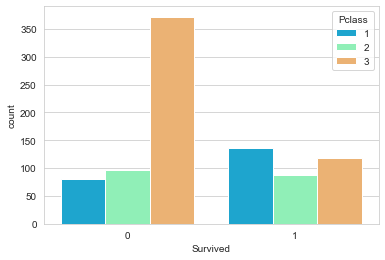

In [110]:
sns.countplot(data=dataset,x='Survived',hue='Pclass',palette='rainbow')

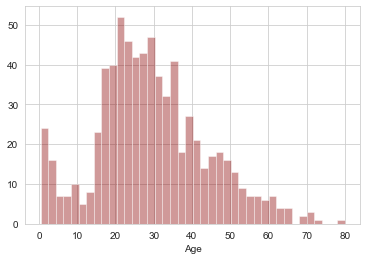

In [111]:
sns.distplot(dataset['Age'].dropna(),kde=False,color='darkred',bins=40)

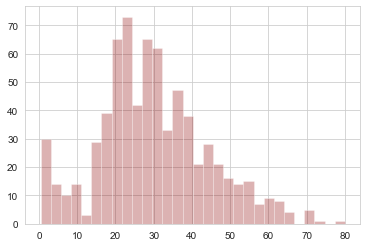

In [112]:
dataset['Age'].hist(bins=30,color='darkred',alpha=0.3)

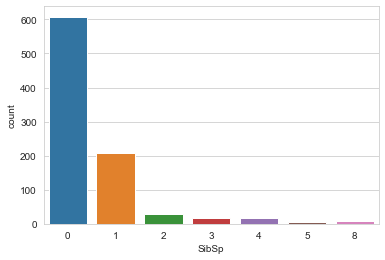

In [113]:
sns.countplot(x='SibSp',data=dataset)

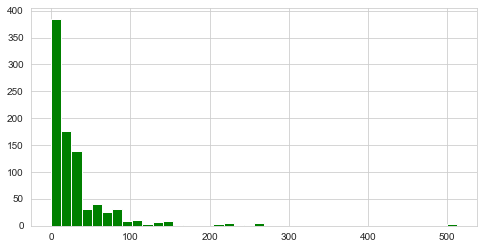

In [114]:
dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning

In [115]:
#Check how many columns have null values
null_col = dataset.columns[dataset.isnull().any()]
null_col

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [116]:
dataset[null_col].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [117]:
#to find out the index of those NaN values particular col
print(dataset[dataset["Embarked"].isnull()][null_col])

      Age Cabin Embarked
61   38.0   B28      NaN
829  62.0   B28      NaN


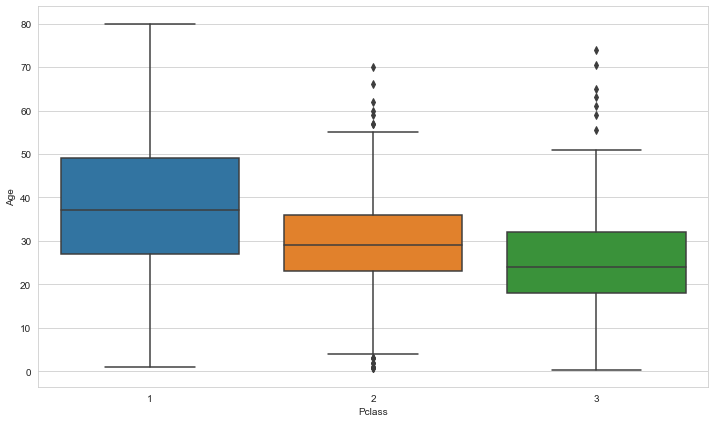

In [118]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=dataset)

In [119]:
def correct_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        if Pclass==2:
            return 29
        
        if Pclass==3:
            return 24
    else:
        return Age

In [120]:
dataset['Age'] = dataset[['Age','Pclass']].apply(correct_age,axis=1)

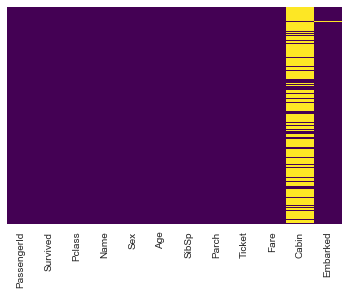

In [121]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

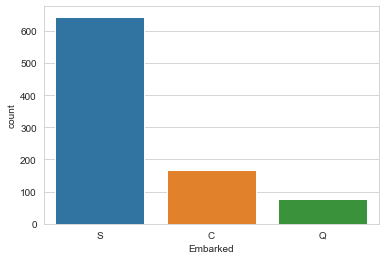

In [122]:
sns.countplot(data=dataset,x="Embarked")

In [123]:
null_col = dataset.columns[dataset.isnull().any()]
null_col

Index(['Cabin', 'Embarked'], dtype='object')

In [124]:
dataset[null_col].isnull().sum()

Cabin       687
Embarked      2
dtype: int64

In [126]:
dataset.mode() #gives you S for Embarked columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#Replace two missing values of Embarked with mode of Emabarked : S
dataset['Embarked'] = dataset['Embarked'].replace(np.NaN,'S')   

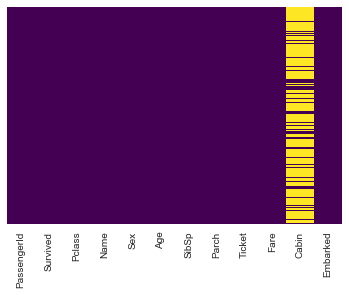

In [128]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [129]:
dataset.drop('Cabin',axis=1,inplace=True)

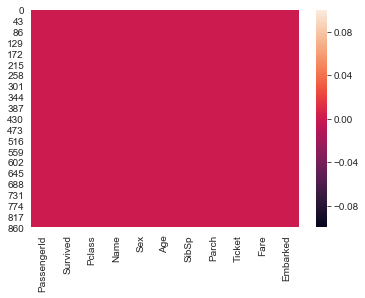

In [131]:
sns.heatmap(dataset.isnull())

In [130]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features to Numeric

In [132]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [137]:
#get_dummies function will change the categorical values to boolean values.
#Here P Q S are unique values, P is not there because Q and S can tell us the P value. 
#For example : 2nd row of output -> Q as 0 and S as 0 implies P is 1
pd.get_dummies(dataset['Embarked'],drop_first=True).head() 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [139]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [140]:
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [141]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [142]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [143]:
dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Building Logistic Regression model

In [149]:
X = dataset.drop('Survived',axis=1)

In [150]:
y = dataset['Survived']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [153]:
##Training and Prediction
from sklearn.linear_model import LogisticRegression

In [158]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
predictions = logmodel.predict(X_test)

In [160]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [161]:
from sklearn.metrics import confusion_matrix

In [173]:
accuracy = confusion_matrix(predictions,y_test)
accuracy

array([[135,  41],
       [ 19,  73]], dtype=int64)

In [174]:
from sklearn.metrics import accuracy_score

In [176]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7761194029850746